In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings as ws
import matplotlib.pyplot as plt
import seaborn as sns
ws.defeaultaction = "ignore"

In [2]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
print("===NULL===")
print(df.isnull().sum())

===NULL===
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
# printing the Zeros 

In [10]:
# The missing observations are putted as the 0 not the NAN
print("====== Any Zeros =====")
df.eq(0).sum()

====== Any Zeros =====


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## We arereplacing the zeor's with the NAN. But  during the conversion we are not replacing the values of the column df.Pregenenci and df.Outcome because the 0 is the real vaiue in that column instead of the missing value 

In [13]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
df.fillna(df.mean(), inplace = True)

In [18]:
# The  above line replace  each columns nan value with the columns mean values

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

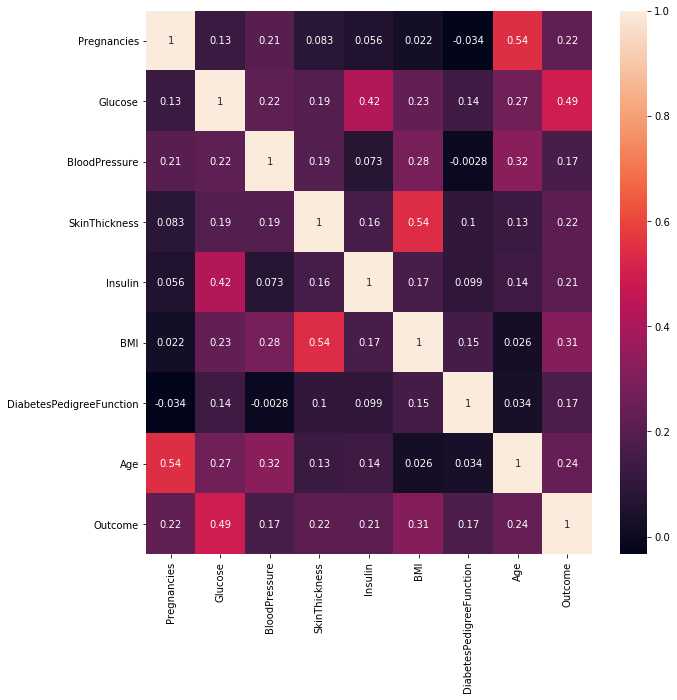

In [22]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True)

In [26]:
cor = df.corr()

In [27]:
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


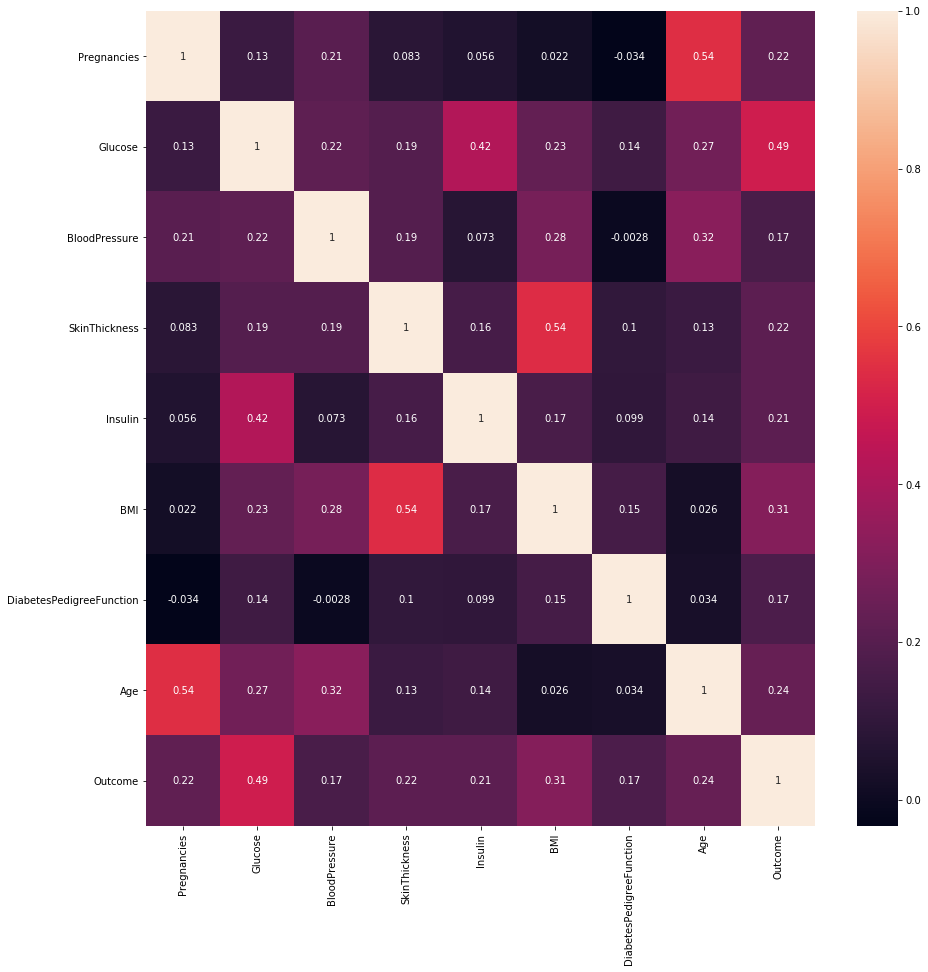

In [28]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True)

In [31]:
#---get the top four features that has the highest correlation---
print(df.corr().nlargest(4, 'Outcome').index)

#---print the top 4 correlation values---
print(df.corr().nlargest(4, 'Outcome').values[:,8]) 


Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')
[1.         0.49292767 0.31192439 0.23835598]


In [32]:
# These are the top four outcomes of the  correlation martrix

In [44]:
X = df[['Glucose', 'BMI', 'Age']]
y = df[['Outcome']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 21)

In [35]:
print(X_train.shape)

(614, 3)


In [36]:
print(X_test.shape)

(154, 3)


In [37]:
(print(y_train.shape))

(614, 1)


In [38]:
print(y_test.shape)

(154, 1)


## Here we are using the Main Top 3 Algo to train our model
1. KNN 
2. Logistic Regression
3. SVM

In [39]:
# By using K-fold cross validation

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [41]:
X.shape

(768, 3)

In [42]:
y.shape

(768, 1)

In [95]:
import warnings as ws
regression = LogisticRegression()
y = df.iloc[:, 8]
regression_score = cross_val_score(regression, X,y, cv= 10, scoring="accuracy").mean()
print(regression_score)
ws.defaultaction = "ignore"


0.7617737525632263


In [55]:
regression_one = LogisticRegression()
y = df[["Outcome"]]
regression_one_score = cross_val_score(regression_one, X,y, cv= 10, scoring="accuracy").mean()
print(regression_one_score)
ws.defaultaction = "ignore"

0.7617737525632263


In [57]:
Result = [regression_one_score]

In [59]:
folds = 10
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))

In [72]:
no_neighbours = [i for i in range (1, 100)]

In [73]:
cv_score = []
n_fold = 10
for i in no_neighbours:
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=n_fold,scoring="accuracy").mean()
    cv_score.append(score)

knn_score = max(cv_score)
for i,j in zip(no_neighbours, cv_score):
    print("Neighbours {0} =======> Score {1}".format(i,j))

Neighbours 1 =======> Score 0.6835099111414901
Neighbours 2 =======> Score 0.7070061517429937
Neighbours 3 =======> Score 0.7187457279562542
Neighbours 4 =======> Score 0.7160457963089542
Neighbours 5 =======> Score 0.7291011619958988
Neighbours 6 =======> Score 0.7408407382091593
Neighbours 7 =======> Score 0.7434381408065618
Neighbours 8 =======> Score 0.7499658236500342
Neighbours 9 =======> Score 0.7395762132604238
Neighbours 10 =======> Score 0.753879015721121
Neighbours 11 =======> Score 0.7539302802460697
Neighbours 12 =======> Score 0.7577922077922079
Neighbours 13 =======> Score 0.7630553656869447
Neighbours 14 =======> Score 0.7539131920710869
Neighbours 15 =======> Score 0.7604237867395762
Neighbours 16 =======> Score 0.7617053998632947
Neighbours 17 =======> Score 0.7669343814080657
Neighbours 18 =======> Score 0.7656356801093643
Neighbours 19 =======> Score 0.7721462747778537
Neighbours 20 =======> Score 0.7760423786739576
Neighbours 21 =======> Score 0.7669343814080655
Ne

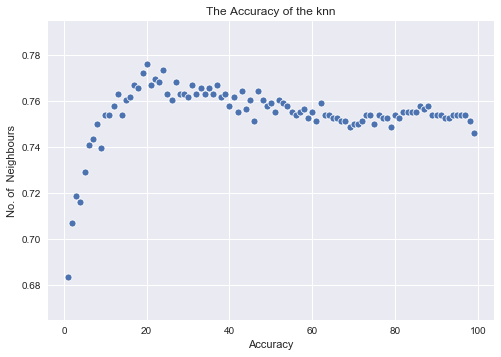

In [76]:
plt.style.use("seaborn")
sns.scatterplot(no_neighbours, cv_score)
plt.xlabel("Accuracy")
plt.ylabel("No. of  Neighbours")
plt.title("The Accuracy of the knn")
plt.show()


In [78]:
len(no_neighbours)

99

In [79]:
max(cv_score)

0.7760423786739576

In [81]:
print("Optimal No. of Neighbours is ",cv_score.index(max(cv_score)))
print("The Max score is ", max(cv_score))

Optimal No. of Neighbours is  19
The Max score is  0.7760423786739576


In [82]:
Result

[0.7617737525632263, 0.7760423786739576]

## Now we are using the SVM  

In [86]:
from sklearn import svm
 
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
                                   cv=10, scoring='accuracy').mean()
 
print(linear_svm_score)
Result.append(linear_svm_score) 

0.7656527682843473


In [87]:
Result

[0.7617737525632263, 0.7760423786739576, 0.7656527682843473]

#### SVM using the RBF Kernel

In [89]:
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
Result.append(rbf_score)

0.6353725222146275


In [94]:
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(Result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
K Nearest Neighbors,0.776042
SVM Linear,0.765653
Logistic Regression,0.761774
SVM RBF Kernel,0.635373


##### As we can see from the  above training the accuracy ot the model is maximum when we use the Model KNN

##### Now we will finalize the complete model using the KNN with the 19 No. of neighbours

In [96]:
print("hello world")

hello world


In [97]:
# Final Model
neighbours = 19

KNN = KNeighborsClassifier(n_neighbors=19)
KNN.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [98]:
print("The Score is ", KNN.score(X, y))

The Score is  0.7942708333333334


In [103]:
import pickle
#---save the model to disk---
filename = 'diabetes.sav'
 
#---write to the file using write and binary mode---
pickle.dump(KNN, open(filename, 'wb')) 

In [104]:
#---load the model from disk---
loaded_model = pickle.load(open(filename, 'rb')) 

In [105]:
# Making predictions on the new data using the loaded module

In [106]:
Glucose = 65
BMI = 70
Age = 50
 
prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if (prediction[0]==0):
    print("Non-diabetic")
else:
    print("Diabetic")

[0]
Non-diabetic


In [107]:
proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%") 

[[0.94736842 0.05263158]]
Confidence: 94.74%
